# Pyomo -  modelovanje optimizacionih problema

<a href='http://www.pyomo.org/'> Pyomo </a> je ime biblioteke koja se može koristiti za modelovanje optimizacionih problema. Biblioteka raspolaže mnogobrojnim konstrukcijama kojima se problemi mogu opisati u terminima promenljivih, parametara i relacija koje ih povezuju, mehanizmima kojima se ovako uvedenim problemima mogu pridružiti ciljne funkcije i zadaci optimizacije, kao i skupom rešavača kojima se problemi mogu rešiti i propratno analizirati. Biblioteka nudi mogućnost rešavanja problema linarnog, kvadratnog i nelinearnog programiranja, kao i mnoge varijante ovih problema.

Osnovne komponente modela koje ćemo kreirati su promenljive, parametri i relacije. Promenljive predstavljaju nepoznate delove modela čije vrednosti treba odrediti. Parametri su simboličke reprezentacije realnih podataka i mogu se menjati za različite probleme i njihove scenarije. Relacije, kao što su jednakosti i nejednakosti, povezuju različite delove modela i definišu njihove odnose. Svakom modelu ćemo posebno pridružiti ciljnu funkciju. 

Paket Pyomo se može instalirati naredbom `conda install -c conda-forge pyomo`. Posebno treba instalirati rešavače koji se koriste za rešavanje konkretnih problema. Za najveći broj njih, takođe, postoji `conda` podrška.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

Na početku rada, potrebno je učitati pyomo okruženje za modelovanje.

In [2]:
from pyomo.environ import *

Osnovne koncepte Pyomo biblioteke uvešćemo kroz zadatak minimizacije Rozenbrokove funkcije oblika $f(x, y) = (1-x)^2+10(y-x^2)^2$. Ova funkcija ima globalni minimum u tački $(1, 1)$ ali ga je teško pronaći zbog nekonveksne prirode funkcije $f$. 

In [3]:
def f(x, y):
    return (1-x)**2 + 10*(y-x**2)**2

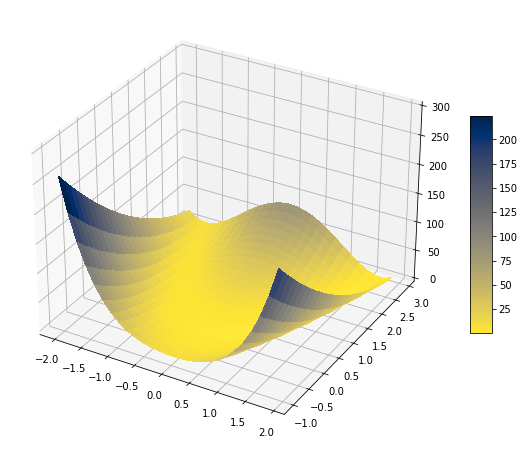

In [4]:
# pripremamo panel za 3d crtanje
fig = plt.figure(figsize=(10, 8))
axRos = fig.gca(projection='3d')

# izracunavamo vrednosti funkcije
x = np.arange(-2, 2, 0.15)
y = np.arange(-1, 3, 0.15)
x, y = np.meshgrid(x, y)
z = f(x, y)

# iscrtavamo grafik funkcije 
surf = axRos.plot_surface(x, y, z, cmap=cm.cividis_r, linewidth=0, antialiased=False)
axRos.set_zlim(0, 300)
fig.colorbar(surf, shrink=0.5, aspect=10)

# prikazujemo grafik
plt.show()

Pyomo model se može konstuisati pozivom funkcije `ConcreteModel`.

In [5]:
model = ConcreteModel()

Konkretni modeli su tip modela koji očekuju podatke pri konstrukciji samog modela. Nasuprot njima postoje i apstraktni modeli koji se konstruišu pozivom funkcije `AbstractModel`, a koji dozvoljavaju dodavanje podataka u kasnijem radu.

Promenljive kojim model raspolaže se konstruišu pozivom funkcije `Var`. Njih karakteriše domen, početna vrednost, granice ili jedinice meranja. Promenljive postoje unutar modela pa ih je nakon konstrukcije potrebno pridružiti nekom svojstvu objekta modela.

Sledećim dvema naradbama uvode se promenljive modela `x` i `y`. Početne vrednosti promenljivih su navedene parametrom `initialize`, a granice dozvoljenih vrednosti parametrom `bounds`. Ukoliko promenljiva nema gornje ili donje ograničenje, može se navesti vrednost `None`.

In [6]:
model.x = Var(initialize=-1.2, bounds=(-2, 2))
model.y = Var(initialize=1.2, bounds=(-2, 2))

Ciljna funkcija se konstruiše pozivom funkcije `Objective`. Izraz kojim se definiše njena forma se može navesti svojstvom `expr`. U njemu se mogu pojaviti sve promenljive modela. Parametrom `sense` se naglašava da li je reč o zadatku maksimizacije ili minimizacije. Podrazumevano se rešava zadatak minimizacije.

In [7]:
model.obj = Objective(expr= (1-model.x)**2 + 10*(model.y-model.x**2)**2, sense=minimize)

Rešavač optimizacionog problema konstruiše se pozivom funkcije `SolverFactory` na osnovu zadatog imena rešavača. Pyomo podržava rad sa velikim brojem rešavača. Mi ćemo iskoristiti rešavač `ipopt` (skraćeno od Interior Point Optimizer) koji se koristi za zadatke nelinearne optimizacije. On se može instalirati naredbom `conda install -c conda-forge ipopt`. Sam objekat rešavača sadrži metod `solve` kojim se inicira rešavanje optimiziacionog zadatka. Uvid u rezultat rešavača se može dobiti pozivom funkcije `pprint` na nivou samog modela, a detaljan izveštaj rešavača pozivom funkcije `write` na nivou rezultata.  

In [8]:
# !pyomo help --solvers

In [9]:
solver = SolverFactory('ipopt')
result = solver.solve(model)

Izveštaj rešavača:

In [10]:
result.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.13.4\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.176849365234375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Ispis rezultata: 

In [11]:
model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :    -2 : 0.9999999974751824 :     2 : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :    -2 : 0.9999999948614867 :     2 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (1 - x)**2 + 10*(y - x**2)**2

3 Declarations: x y obj


Sličan izveštaj se dobija i pozivom funkcije `display` na nivou modela.

In [12]:
model.display()

Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :    -2 : 0.9999999974751824 :     2 : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :    -2 : 0.9999999948614867 :     2 : False : False :  Reals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 6.4536970130320204e-18

  Constraints:
    None


Vrednosti pojedinačnih promenljivih se mogu ispisati korišćenjem funkcija čija imena odgovaraju imenima promenljivih ili korišćenjem svojstva `value` na nivou promenljivih.

In [13]:
print('Resenje je: ', model.x(), model.y())

Resenje je:  0.9999999974751824 0.9999999948614867


In [14]:
print('Resenje je: ', model.x.value, model.y.value)

Resenje je:  0.9999999974751824 0.9999999948614867


Alternative Pyomo biblioteke su <a href='https://pypi.org/project/PuLP/'>PuLP</a> i <a href='https://www.gurobi.com/documentation/9.1/quickstart_mac/cs_grbpy_the_gurobi_python.html'>gurobipy</a>. Sve ove biblioteke poštuju slične principe rada uz ograničenja broja i tipa rešavača koje stavljaju na raspolaganje. Svakako predlažemo da ih istražite!